# Training results
This notebook reports the results of several run on the Google Compute Engine done with different configurations.


## Configuration 1 worker 1 vCPU

,ts,val
275,1517592060,0.0011579228
276,1517592120,0.0018753141
277,1517592180,0.0013236736
278,1517592240,0.0021184302
279,1517592300,0.0169828667
280,1517592360,0.2142134724
281,1517592420,0.8286531524
282,1517592480,0.7826249808
283,1517592540,0.7525898313
284,1517592600,0.8384966029


[1] 359

[1] 2340

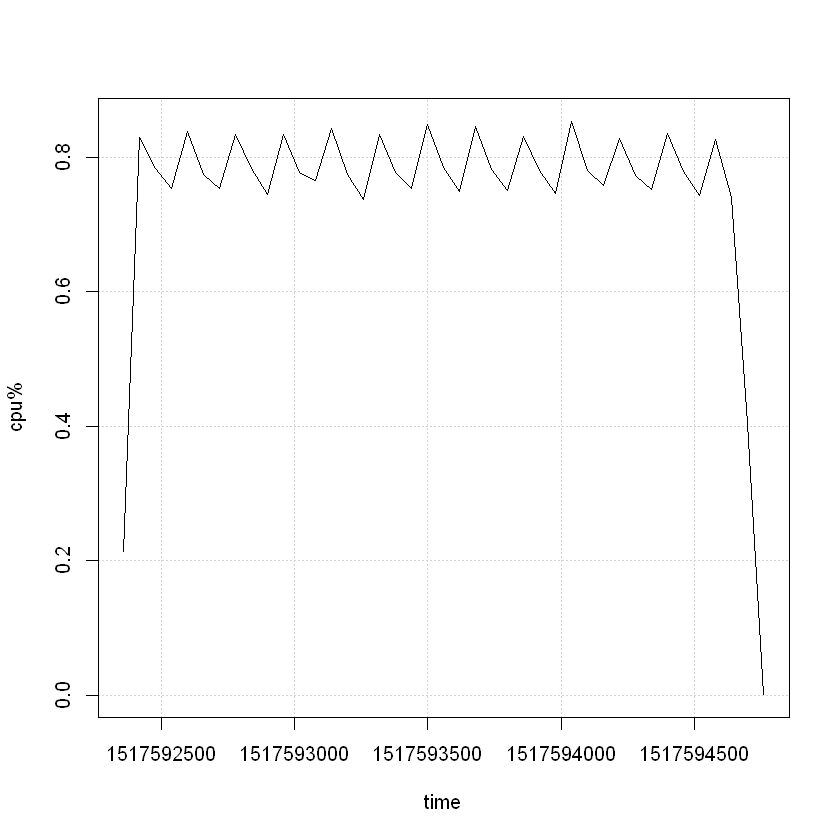

In [36]:
library("jsonlite")
library(tibble)

json_data <- as_data_frame(jsonlite::fromJSON("results/last.json")$data)
df <- as_data_frame(json_data)
master_data <- subset(json_data, resource_name == "master-0")$data
master_data <- do.call("rbind", master_data)
master_data[275:330,]
nrow(master_data)
master_data[319,1]-master_data[280,1]
plot(master_data[280:320,],type='l',xlab="time",ylab="cpu%",panel.first = grid())
# start 1517487780
# stop 1517493000


In [2]:
w <- c(1,2,3,4,5)
real <- c(5227,3426,2628,2319,2100)
offset <- 3426-5227
linear <- c(real[1],real[1]+offset,real[2]+offset,real[3]+offset,real[4]+offset)
s = matrix( 
   c(linear, real), 
   nrow=5, 
   ncol=2)


df2 <- data.frame(speedup=sc("Linear", "Real"),
                workers=rep(w,2),
                len=s)
head(df2)

library(ggplot2)

# Change line types and point shapes
ggplot(df2, aes(x=workers, y=len, group=speedup)) +
  geom_line(aes(linetype=speedup))+
  geom_point(aes(shape=speedup))

ERROR: Error in sc("Linear", "Real"): non trovo la funzione "sc"


In [32]:
real <- c(5227,3426,2628,2319,2100)
offset = 3426-5227
c(real[1],real[1]+offset,real[2]+offset,real[3]+offset,real[4]+offset)

[1] 5227 3426 1625  827  518